<h3>Install necessary package</h3>

In [26]:
!pip install sentence_transformers
!pip install openpyxl
!pip install xlrd


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


<h3>Import class from the installed package</h3>

In [27]:
from sentence_transformers import SentenceTransformer

<h3>Download BERT model</h3>

In [28]:
model = SentenceTransformer('bert-base-cased')

No sentence-transformers model found with name bert-base-cased. Creating a new one with mean pooling.
C:\Users\Dawid\PycharmProjects\Sztuczna inteligencja\MachineLearning\.venv\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


# Generowanie embeddingów dla żartów

In [29]:
import pandas as pd
import numpy as np

jokes = pd.read_excel('Dataset3JokeSet.xlsx', header=None)

jokes_embeddings = model.encode(jokes[0].tolist())

ratings = pd.read_excel('FINAL jester 2006-15.xls', header=None)

ratings = ratings.drop(columns=[0])

ratings = ratings.replace(99, np.nan)

ratings = ratings.fillna(0)

In [30]:
jokes_embeddings

array([[ 0.2268996 ,  0.0808524 ,  0.19379224, ...,  0.3482189 ,
         0.1681642 ,  0.22305503],
       [ 0.08381999,  0.15879391, -0.1869314 , ...,  0.2413836 ,
        -0.09729488, -0.13394879],
       [ 0.02886746,  0.04255911, -0.07353062, ...,  0.24468495,
         0.04791439, -0.17327291],
       ...,
       [ 0.23755585, -0.05837827, -0.0753201 , ...,  0.16409028,
        -0.05046068, -0.03083063],
       [-0.04544041, -0.03773556, -0.03491614, ...,  0.43853718,
        -0.08507558, -0.02907868],
       [ 0.05929362, -0.17123948,  0.00697887, ...,  0.20745495,
         0.00713675, -0.02278747]], dtype=float32)

In [31]:
print(ratings.head(5))

   1    2    3    4        5    6        7        8    9    10   ...  141  \
0  0.0  0.0  0.0  0.0  0.21875  0.0 -9.28125 -9.28125  0.0  0.0  ...  0.0   
1  0.0  0.0  0.0  0.0 -9.68750  0.0  9.93750  9.53125  0.0  0.0  ...  0.0   
2  0.0  0.0  0.0  0.0 -9.84375  0.0 -9.84375 -7.21875  0.0  0.0  ...  0.0   
3  0.0  0.0  0.0  0.0  6.90625  0.0  4.75000 -5.90625  0.0  0.0  ...  0.0   
4  0.0  0.0  0.0  0.0 -0.03125  0.0 -9.09375 -0.40625  0.0  0.0  ...  0.0   

   142  143  144  145  146  147  148  149  150  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 150 columns]


# Dzielenie danych na zbiór treningowy i testowy

In [32]:
from sklearn.model_selection import train_test_split

transposed_ratings = ratings.T

X_train, X_test, y_train, y_test = train_test_split(jokes_embeddings, transposed_ratings, test_size=0.2, random_state=42)

# Testowanie
## Podstawowy model MLP z dymyślnymi hiperparametrami

MLP to rodzaj sztucznej sieci neuronowej składający się z co najmniej trzech warstw: warstwy wejściowej, jednej lub więcej warstw ukrytych oraz warstwy wyjściowej. Każdy neuron w jednej warstwie jest połączony z każdym neuronem w warstwie następnej (nazywane pełnym połączeniem). MLP jest często stosowany w zadaniach regresji i klasyfikacji.

W ramach tej listy będę korzystał z klasy MLPRegressor z biblioteki scikit-learn do przewidywania ocen żartów na podstawie ich embeddingów.

Do podstawowych hiperparametrów modelu należą:
- solver - algorytm optymalizacyjny, domyślnie 'adam'
- alpha - parametr regularyzacji, domyślnie 0.0001
- learning_rate - strategia aktualizacji wag, domyślnie 'constant'
- learning_rate_init - początkowa wartość learning rate, domyślnie 0.001
- max_iter - maksymalna liczba iteracji, domyślnie 200
- hidden_layer_sizes - liczba neuronów w warstwach ukrytych, domyślnie (100, )

In [42]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

def test_model(solver='sgd', alpha=0.0, learning_rate='constant', learning_rate_init=0.00001, max_iter=1, hidden_layer_sizes=(100, )):
    mlp = MLPRegressor(solver=solver, alpha=alpha, learning_rate=learning_rate, learning_rate_init=learning_rate_init, max_iter=max_iter, random_state=42, hidden_layer_sizes=hidden_layer_sizes)
    
    train_loss = []
    val_loss = []
    
    epochs = 100
    
    for epoch in range(epochs):
        mlp.partial_fit(X_train, y_train)
        
        y_train_pred = mlp.predict(X_train)
        train_loss.append(mean_squared_error(y_train, y_train_pred))
        
        y_val_pred = mlp.predict(X_test)
        val_loss.append(mean_squared_error(y_test, y_val_pred))
    
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, epochs + 1), train_loss, label='Training Loss')
    plt.plot(range(1, epochs + 1), val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss (Mean Squared Error)')
    plt.title('Training and Validation Loss over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

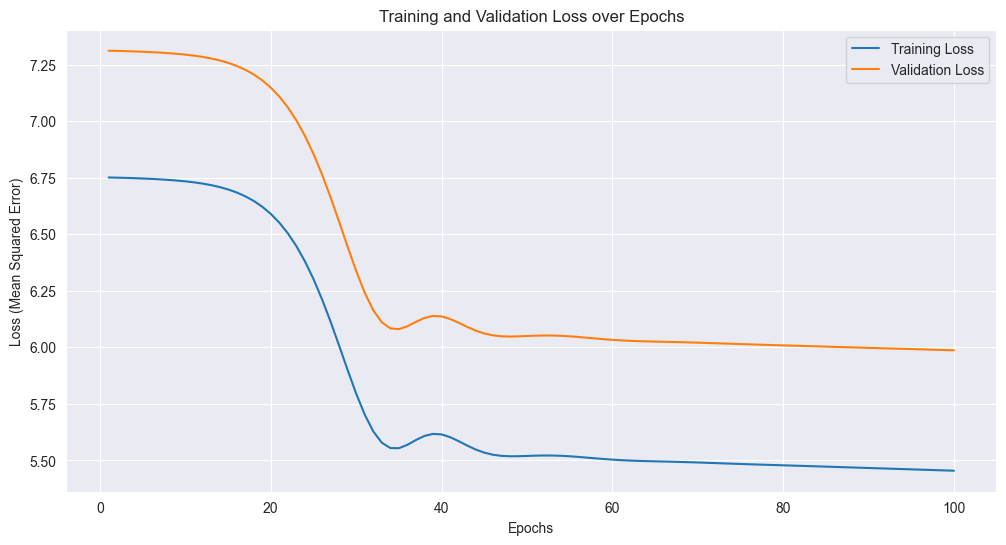

In [39]:
test_model('sgd', 0.0, 'constant', 0.00001, 1)

## Model MLP z różnymi typami learning_rate

Dostępne wartości dla parametru learning_rate to:
- 'constant' - stała wartość learning rate
- 'invscaling' - tempo uczenia maleje odwrotnie proporcjonalnie do liczby epok
- 'adaptive' - tempo uczenia zmienia się adaptacyjnie w zależności od wyników modelu

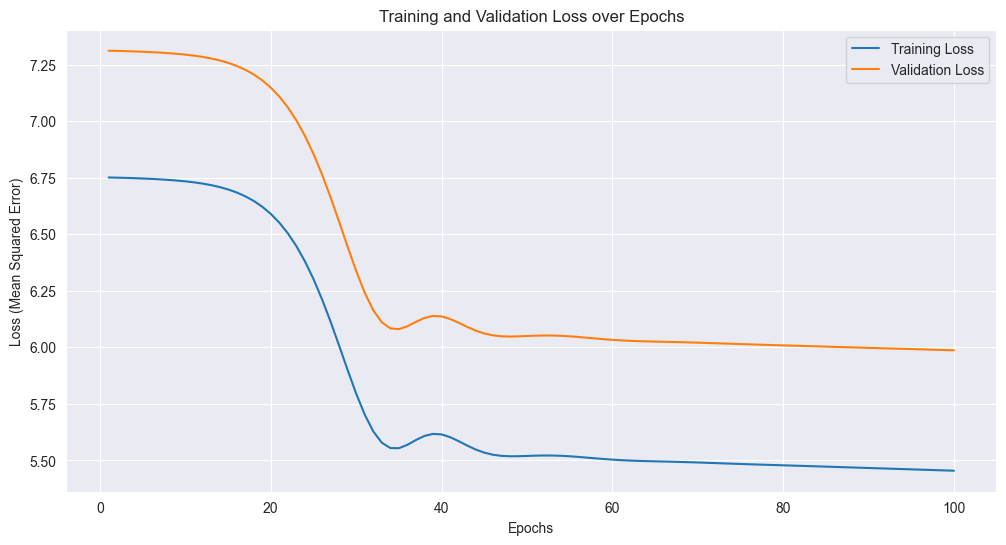

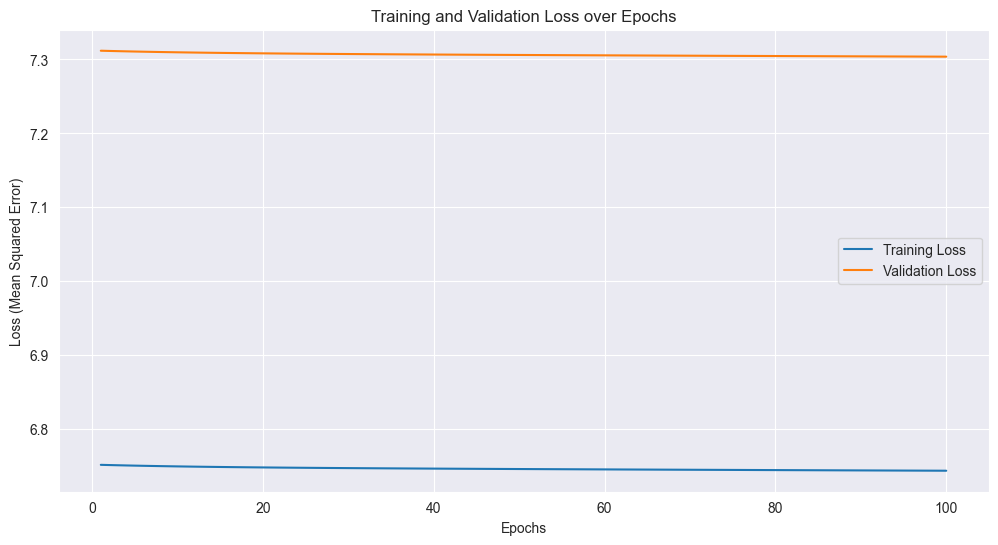

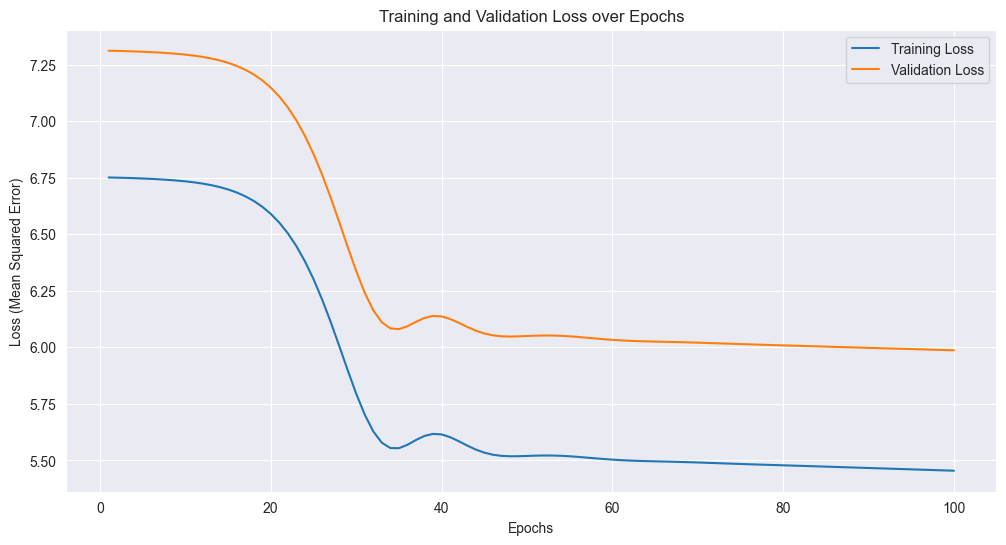

In [40]:
learning_rates = ['constant', 'invscaling', 'adaptive']

for learning_rate in learning_rates:
    test_model('sgd', 0.0, learning_rate, 0.00001, 1)

## Model MLP z różnymi wartościami learning_rate_init

Początkowe tempo uczenia. Domyślnie 0.001.
Określa, jak dużą zmianę wag modelu wprowadza się na początku treningu.

Im mniejsza wartość, tym mniejsze zmiany wag wprowadzane są na początku treningu.

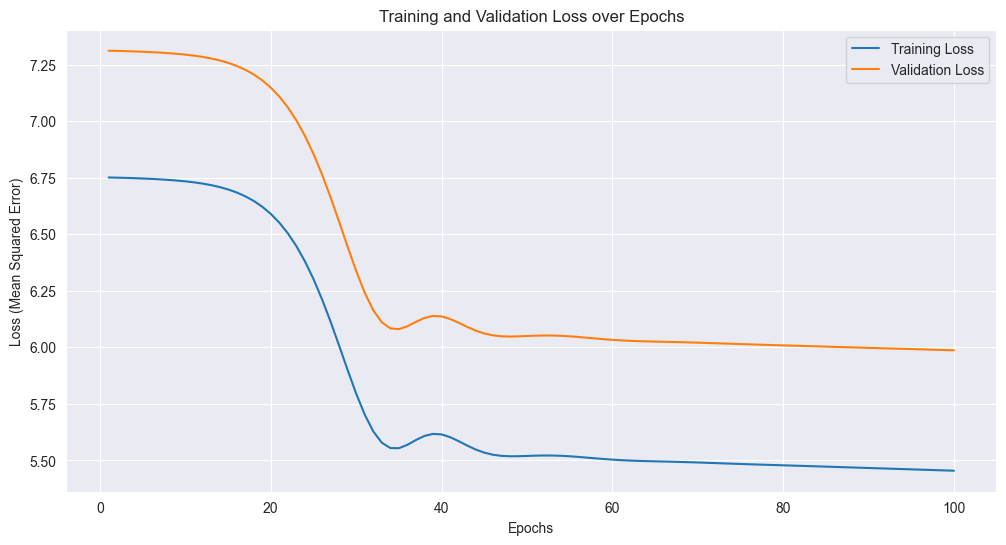

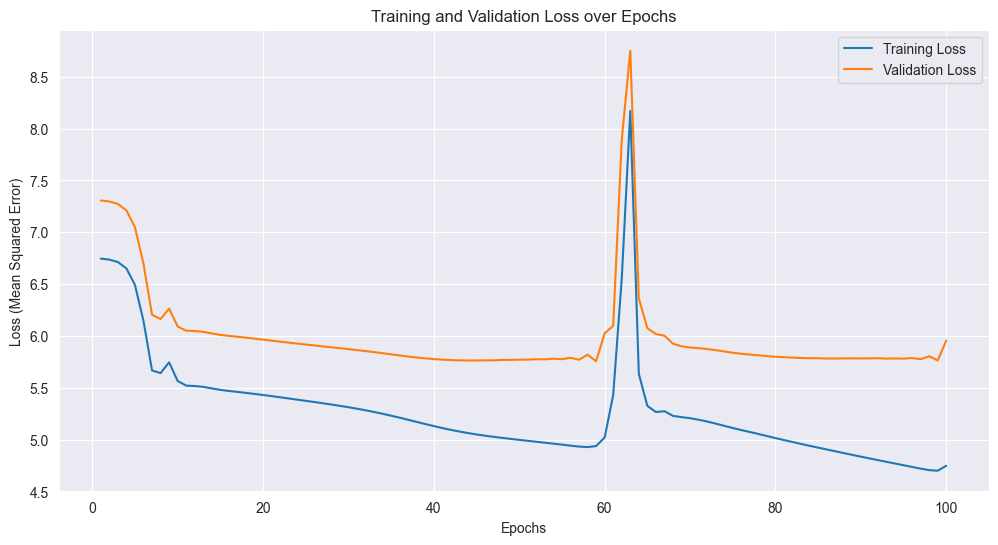

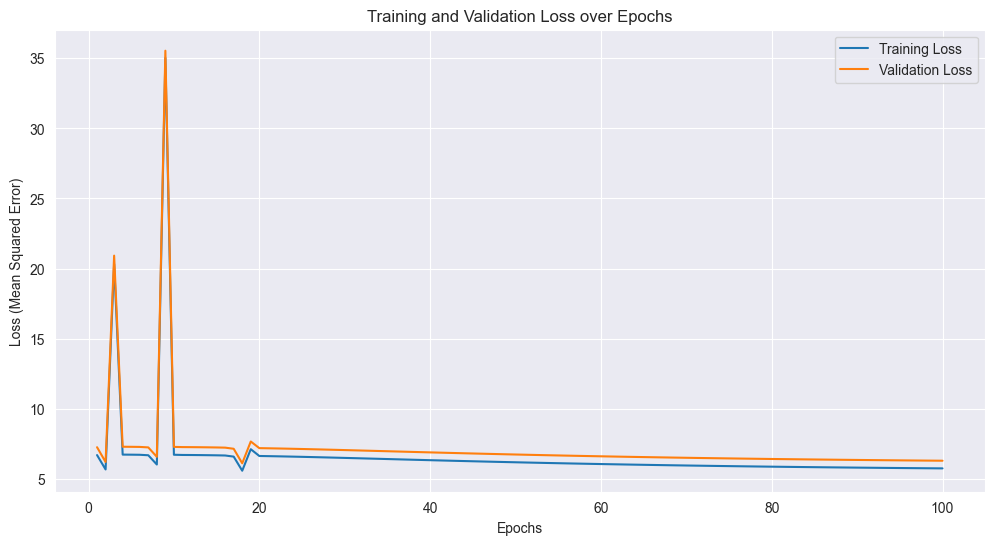

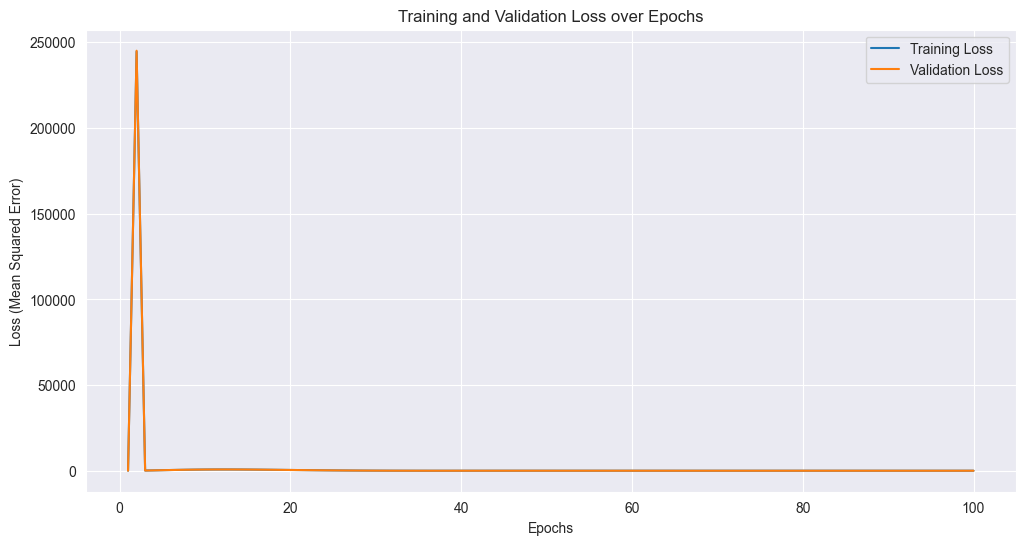

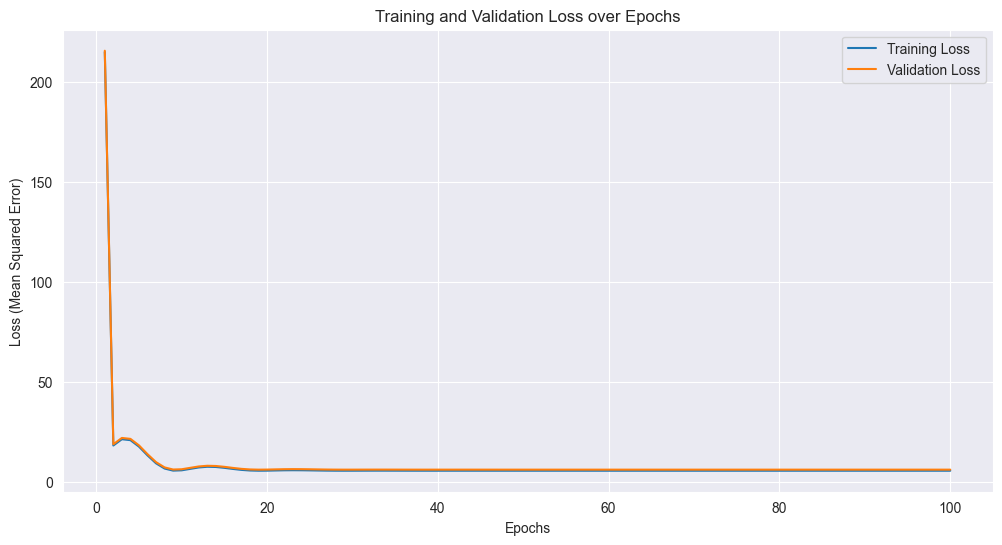

In [58]:
learning_rate_inits = [0.00001, 0.0001, 0.001, 0.01, 0.1]

for learning_rate_init in learning_rate_inits:
    test_model(learning_rate_init=learning_rate_init)

## Model MLP z różną ilością neuronów

Określa liczbę neuronów w każdej warstwie ukrytej.
Domyślna wartość to (100, ), co oznacza jedną warstwę ukrytą z 100 neuronami.
Wartość (50, 50) oznacza dwie warstwy ukryte z 50 neuronami w każdej.

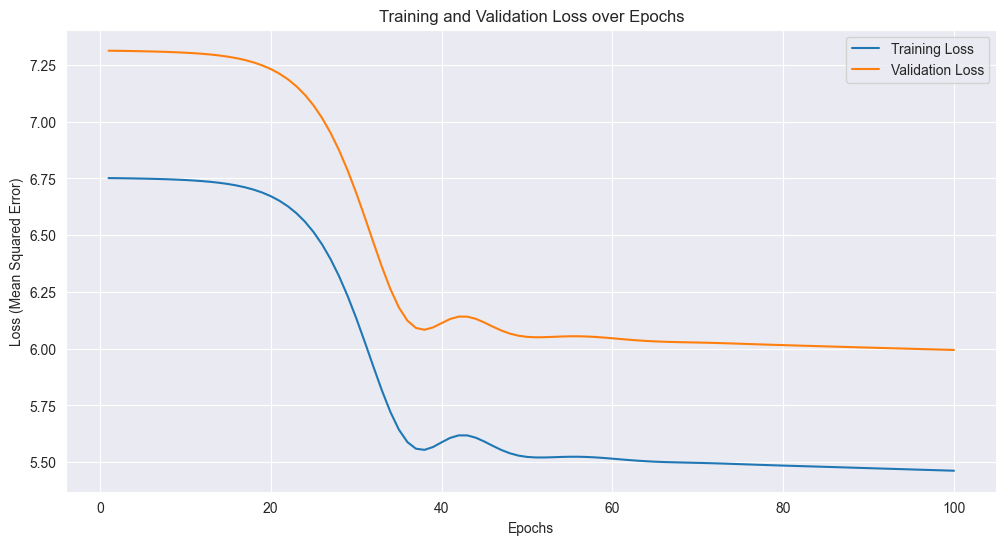

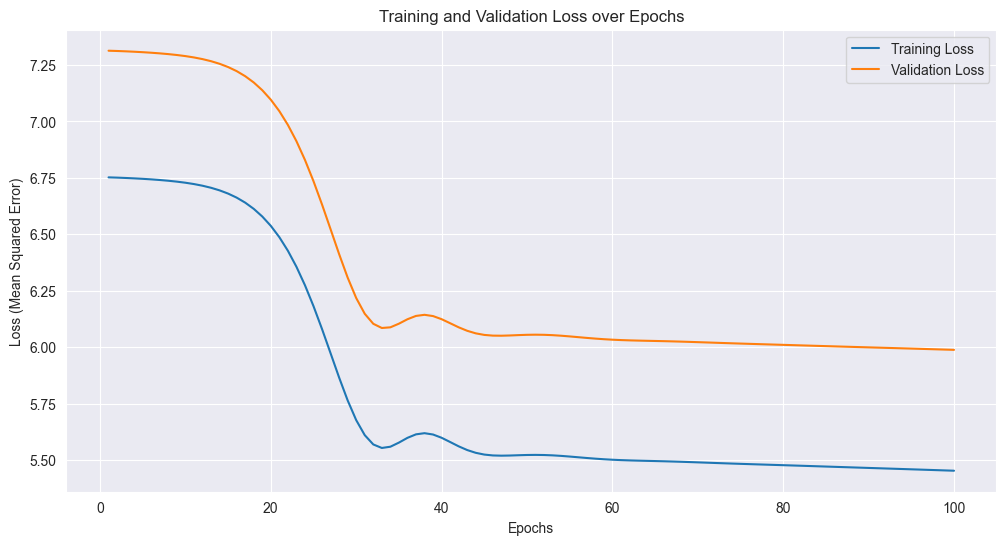

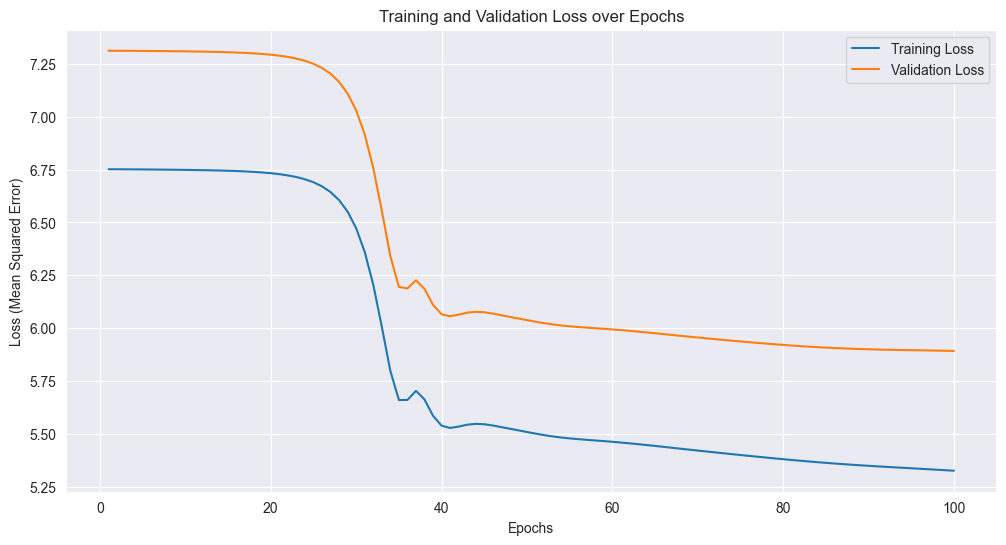

In [43]:
test_model(hidden_layer_sizes=(50,))
test_model(hidden_layer_sizes=(200,))
test_model(hidden_layer_sizes=(50, 50))

# Test praktyczny

Na podstawie powyższych testów wybieram model z następującymi hiperparametrami:
- solver='sgd'
- learning_rate='constant'
- learning_rate_init=0.00001
- hidden_layer_sizes=(50, 50)

Model będzie trenowany przez 100 epok.
Przykładowe żarty zostaną ocenione przez model. Pierwszy żart oceniłbym na 0.4, drugi na 0.2, a trzeci na 0.0 (nie rozumiem go).

In [45]:
mlp = MLPRegressor(solver='sgd', alpha=0.0, learning_rate='constant', learning_rate_init=0.00001, max_iter=1, random_state=42, hidden_layer_sizes=(50, 50))

for epoch in range(100):
    mlp.partial_fit(X_train, y_train)

In [46]:
joke = "What did one ocean say to the other ocean? Nothing, it just waved."

joke_embedding = model.encode([joke])

rating = mlp.predict(joke_embedding)

print(rating[0][0])

0.4335878


In [48]:
joke2 = "What does a baby computer call its father? Data."

joke_embedding2 = model.encode([joke2])

rating2 = mlp.predict(joke_embedding2)

print(rating2[0][0])

0.14163595


In [49]:
joke3 = "If you’re American when you go in the bathroom and American when you come out, what are you in the bathroom? European."

joke_embedding3 = model.encode([joke3])

rating3 = mlp.predict(joke_embedding3)

print(rating3[0][0])

0.95764905


## Wyniki testu praktycznego

### Pierwszy żart
Model ocenił pierwszy żart na 0.43. Jest to wynik zadowalający, ponieważ żart jest zabawny i zrozumiały. Zgadza się to w większości z moją oceną.

### Drugi żart
Model ocenił drugi żart na 0.14. Ten wynik również jest zadowalający, ponieważ jest blisko mojej oceny. Żart jest lekko słaby, ale można zrozumieć humor.

### Trzeci żart
Najciekawsze okazały się wyniki żartu 3. Model ocenił go na 0.95, co jest bardzo wysoką oceną. Moja ocena to 0.0, ponieważ żart jest niezrozumiały. Model ocenił go jako bardzo zabawny, co nie musi być błędem, lecz jest niespodziewane.

### Ogólne wnioski
Model działa zadowalająco, choć każda osoba może mieć inną opinię odnośnie tego samego żartu, przez co trudno ocenić prawidłowość modelu.

# Dodatkowe testy 
## Parametr alpha - regularyzacja

Parametr alpha to wartość regularyzacji. Domyślnie wynosi 0.0001.
Regularyzacja to technika zmniejszania wartości wag modelu w celu uniknięcia przeuczenia. Im większa wartość alpha, tym większa regularyzacja.

W poniższych testach zmiany wartości alpha ani trochę nie wpłynęły na wyniki modelu. Wszystkie modele zachowywały się tak samo.
Jest to zaskakujące, ponieważ regularyzacja powinna wpłynąć na wyniki modelu. Powody mogą być różne, np. zbyt mała wartość alpha, zbyt mała ilość epok, zbyt mała wartość parametru learning_rate_init.

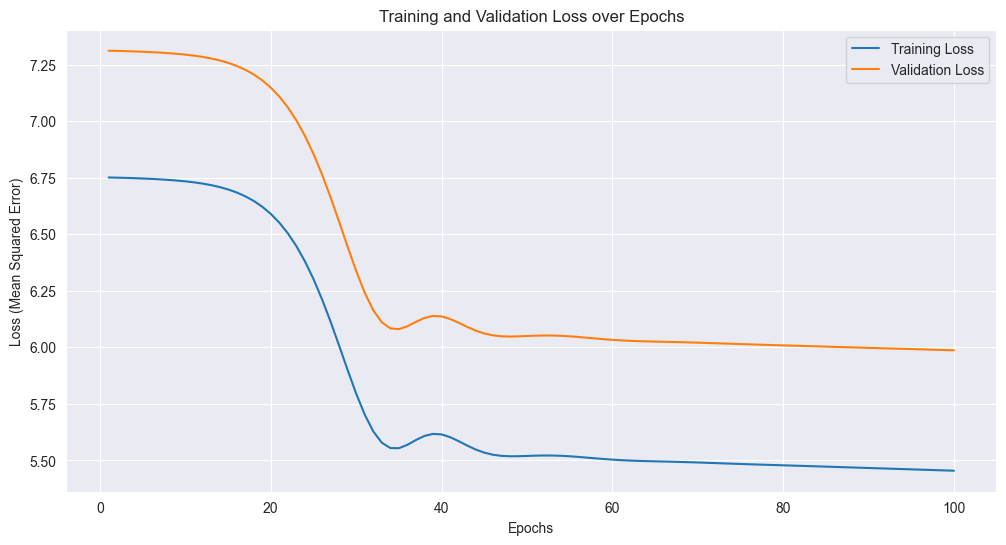

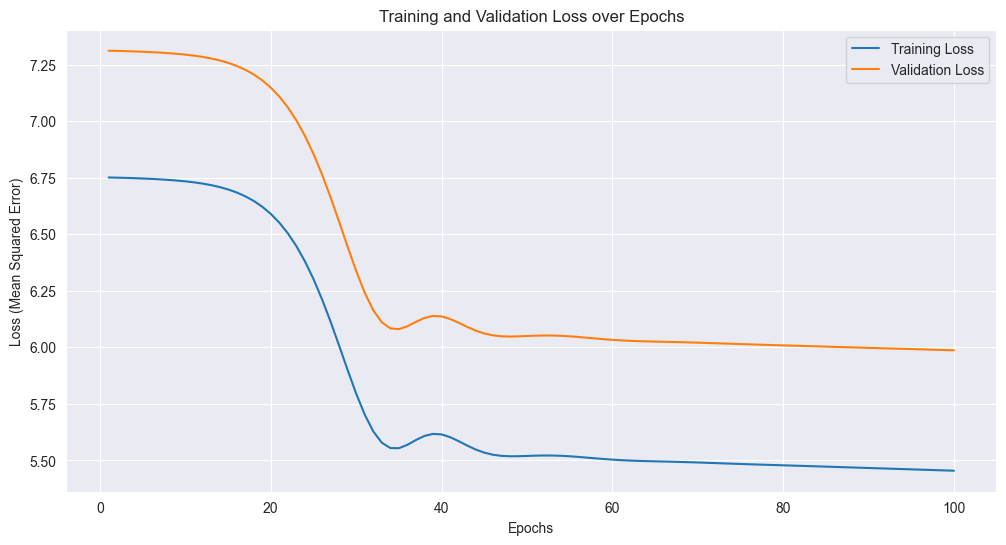

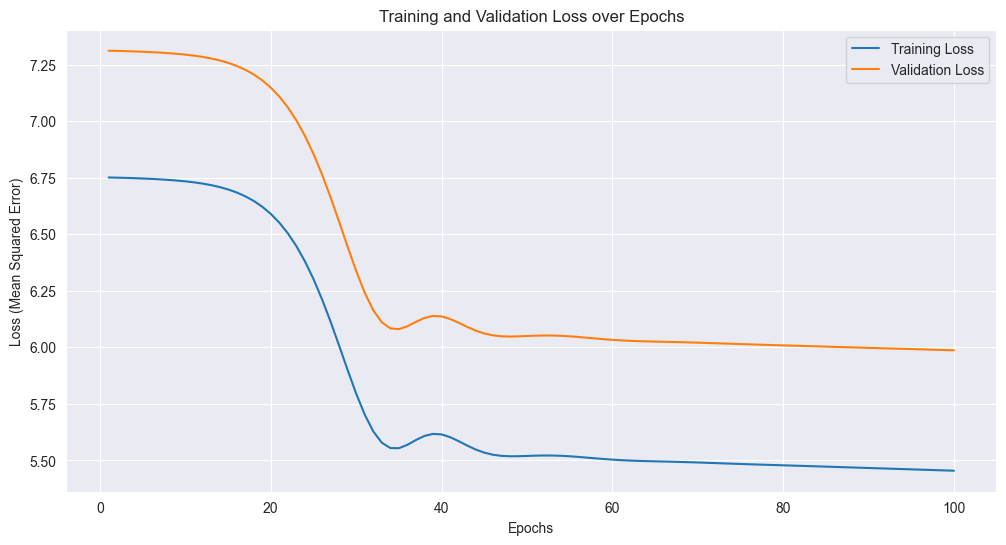

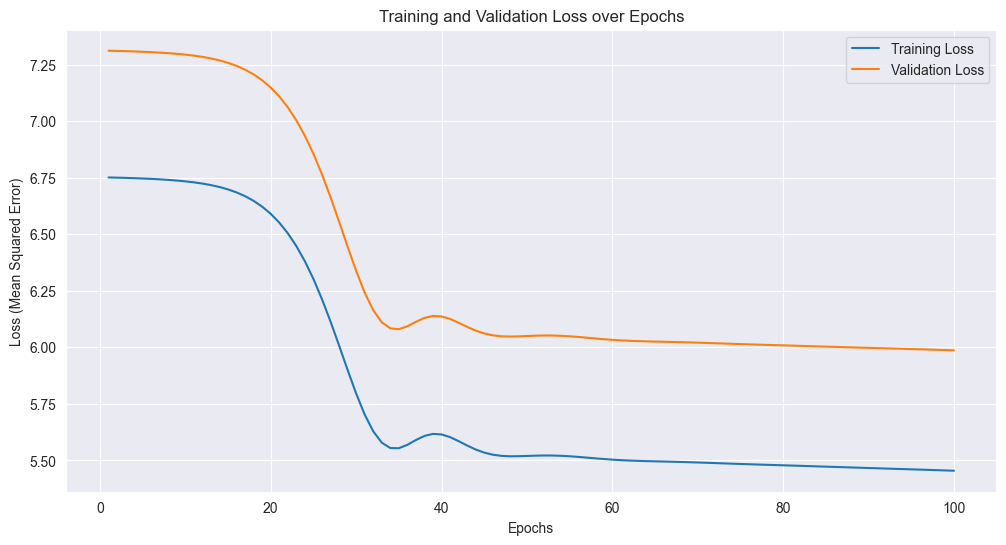

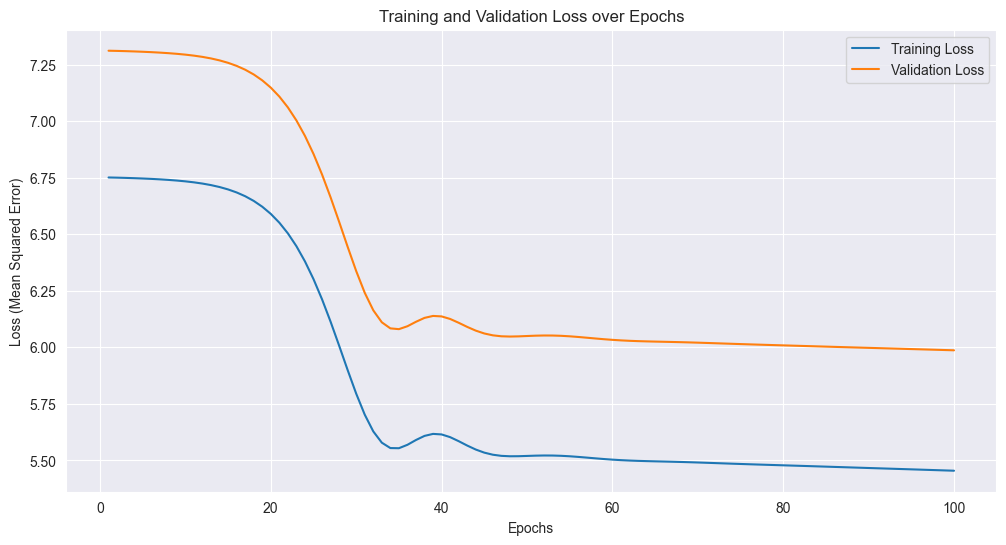

In [50]:
alphas = [0.0, 0.0001, 0.001, 0.01, 0.1]

for alpha in alphas:
    test_model('sgd', alpha, 'constant', 0.00001, 1)

## Parametr solver

SGD (używany wcześniej) to podstawowy algorytm optymalizacji, który aktualizuje parametry modelu na podstawie gradientu funkcji kosztu względem parametrów modelu dla jednej próbki lub małej partii (mini-batch) danych treningowych. Wymaga starannego doboru tempa uczenia.

Adam jest bardziej zaawansowanym algorytmem optymalizacji. Używa adaptacyjnych współczynników uczenia się, które są różne dla różnych parametrów. Automatycznie dostosowuje tempo uczenia, choć nadal wymaga doboru hiperparametrów. Zazwyczaj wymaga mniejszej liczby epok do osiągnięcia podobnych wyników.

Do przeprowadzenia testów z solverem 'adam' zmieniłem wartości parametrów, tak aby uzyskać lepsze wyniki.


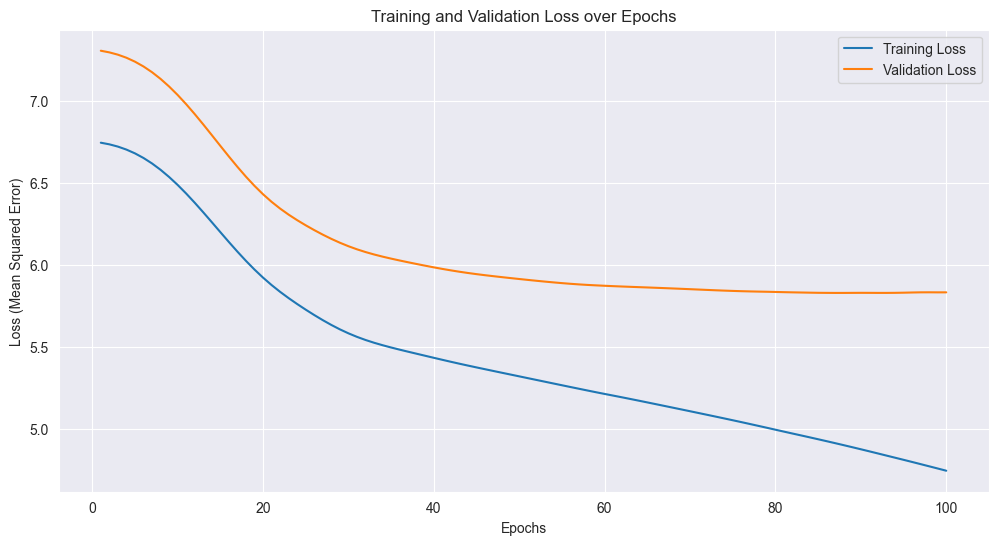

In [60]:
test_model(solver='adam', learning_rate='adaptive', learning_rate_init=0.001, hidden_layer_sizes=(50, 50))